# Machine Learning with Python - Feature Engineering
The basics of feature engineering

### sklearn
Provides lots of tools to help!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read in our titanic data
df_og = pd.read_csv('data/train.csv') 

## one hot encoding

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
df_emb = df_og['Embarked']
df_emb.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
df_emb = df_emb.values.reshape(-1,1)
# create an encoder and fit the dataframe
enc = OneHotEncoder(sparse=False).fit(df_emb)
encoded = enc.transform(df_emb)

# convert it to a dataframe
ohe_df = pd.DataFrame(
     encoded, 
     columns=enc.get_feature_names_out()
)
print(ohe_df.head())
print(ohe_df.shape)

   x0_C  x0_Q  x0_S  x0_nan
0   0.0   0.0   1.0     0.0
1   1.0   0.0   0.0     0.0
2   0.0   0.0   1.0     0.0
3   0.0   0.0   1.0     0.0
4   0.0   0.0   1.0     0.0
(891, 4)


## Text Embedding
[OpenAI embedding service](https://beta.openai.com/docs/guides/embeddings/what-are-embeddings)

## Feature Scaling

<AxesSubplot:>

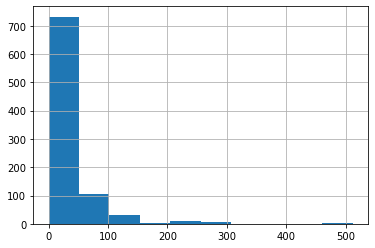

In [6]:
df_og.Fare.hist()

In [7]:
df_og['logFare'] = np.log10(df_og['Fare'], where=df_og['Fare']>0)

In [10]:
df_og.logFare.describe()

count     8.910000e+02
mean    -4.879221e+146
std      1.456429e+148
min     -4.347386e+149
25%       8.981977e-01
50%       1.159994e+00
75%       1.491362e+00
max       2.709549e+00
Name: logFare, dtype: float64

## Principal Component Analysis
Work derived, in part, from example in [this blog post.](https://towardsdatascience.com/image-compression-using-principal-component-analysis-pca-253f26740a9f) I have reduced the size of the data in order to include it in the GitHub repo.

In [16]:
mnist = pd.read_csv('data/mnist.csv')
mnist.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
mnist = mnist.iloc[0:4000,:]

In [18]:
mnist.to_csv('data/mnist.csv')

In [13]:
import matplotlib.pyplot as plt
mnist.drop(columns='label', inplace=True)

Text(0.5, 1.0, 'Tenth image: Digit 4')

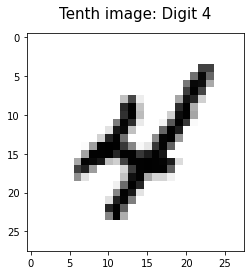

In [14]:
second_image = mnist.iloc[9].values.reshape([28,28])
plt.imshow(second_image, cmap='gray_r')
plt.title('Tenth image: Digit 4', fontsize=15, pad=15)

Next step would be is to scale the features so they are on the same or similar ranges. PCA is very senstive so scale as the method is based on explained variance. Larger sacled values would produce much greater variance. However, in an image all values are already scaled at each pixel (0 to 255 in this case).

In [15]:
print(mnist.iloc[1].min())
print(mnist.iloc[1].max())

0
255


Text(0, 0.5, 'Explained variance')

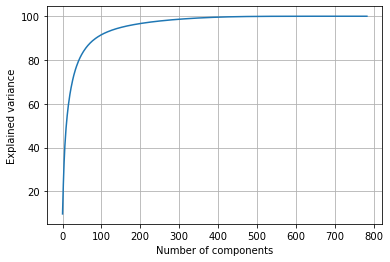

In [16]:
from sklearn.decomposition import PCA

pca_784 = PCA(n_components=784)
pca_784.fit(mnist)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0.5, 1.0, 'Compressed image with 25 components')

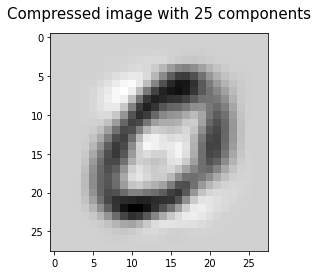

In [17]:
# let's just use the first 25 components
pca_25 = PCA(n_components=25)
mnist_pca_25_reduced = pca_25.fit_transform(mnist)
mnist_pca_25_recovered = pca_25.inverse_transform(mnist_pca_25_reduced)

image_pca_25 = mnist_pca_25_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_25, cmap='gray_r')
plt.title('Compressed image with 25 components', fontsize=15, pad=15)

Text(0.5, 1.0, 'Compressed image with 200 components')

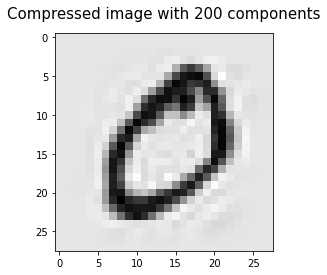

In [18]:
# let's expand to 200 components
pca_200 = PCA(n_components=200)
mnist_pca_200_reduced = pca_200.fit_transform(mnist)
mnist_pca_200_recovered = pca_200.inverse_transform(mnist_pca_200_reduced)

image_pca_200 = mnist_pca_200_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_200, cmap='gray_r')
plt.title('Compressed image with 200 components', fontsize=15, pad=15)

In [19]:
#explained variance
print(np.cumsum(pca_25.explained_variance_ratio_ * 100)[-1])
print(np.cumsum(pca_200.explained_variance_ratio_ * 100)[-1])

69.17970873215833
96.60828623316358
